## Project 1: Deep Learning-Image Classification with CNN
## Team NeuFalcons
 - Mohammed Almatrafi
 - Yazeed Alghamdi
 - Yasser Alshehri

### Loading the data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Exploratory Data Analysis

#### Preprocessing the data

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalizing the data
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

#### Visualising the data

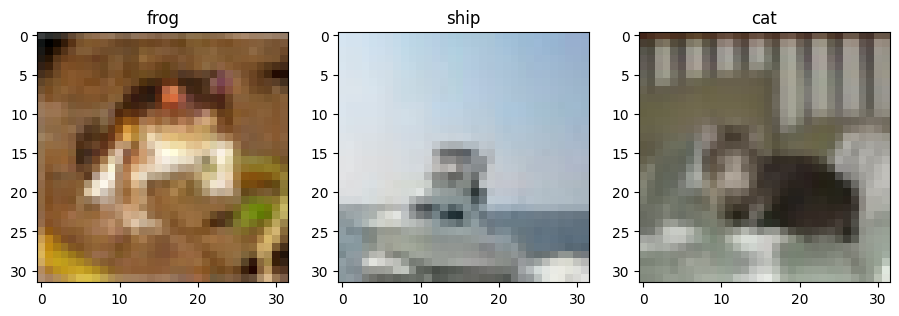

In [4]:
plt.figure(figsize=(11,10))
plt.subplot(1,3,1)
plt.imshow(x_train[0])
plt.title(class_names[y_train[0][0]])
plt.subplot(1,3,2)
plt.imshow(x_train[100])
plt.title(class_names[y_train[100][0]])
plt.subplot(1,3,3)
plt.imshow(x_train[150])
plt.title(class_names[y_train[150][0]])
plt.show()

### Building baseline CNN model

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer
    tf.keras.layers.Flatten(),  # Flatten feature maps
    tf.keras.layers.Dense(100, activation='relu'),  # Dense Layer with 100 units
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

In [8]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ea= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint('best_first_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history1 = model1.fit(x_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.1, callbacks=[ea, mc])

Epoch 1/50
1400/1407 [============================>.] - ETA: 0s - loss: 1.4938 - accuracy: 0.4678
Epoch 1: val_accuracy improved from -inf to 0.57000, saving model to best_first_model.h5
1407/1407 [==============================] - 10s 3ms/step - loss: 1.4930 - accuracy: 0.4680 - val_loss: 1.2623 - val_accuracy: 0.5700
Epoch 2/50
1388/1407 [============================>.] - ETA: 0s - loss: 1.2114 - accuracy: 0.5740
Epoch 2: val_accuracy improved from 0.57000 to 0.59160, saving model to best_first_model.h5
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2109 - accuracy: 0.5742 - val_loss: 1.1790 - val_accuracy: 0.5916
Epoch 3/50
1392/1407 [============================>.] - ETA: 0s - loss: 1.0948 - accuracy: 0.6169
Epoch 3: val_accuracy improved from 0.59160 to 0.59660, saving model to best_first_model.h5
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0952 - accuracy: 0.6170 - val_loss: 1.1580 - val_accuracy: 0.5966
Epoch 4/50
1401/1407 [===========

#### Baseline Model Description

##### Layers
- Convolutional Layer (32 x 32) RGB Image
- Hidden Layers
    - 1. Max Pooling Layer
    - 2. Flatten Layer
    - 3. Dense Layer with 100 units
- Output Layer (10) possible classes

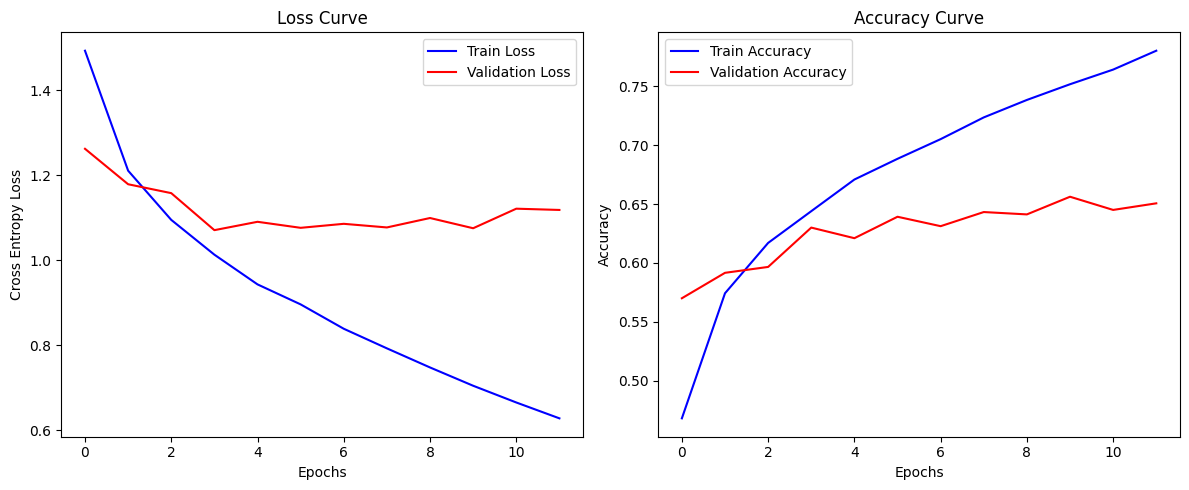

In [9]:
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss', color='blue')
plt.plot(history1.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
model1.load_weights('best_first_model.h5')

Model overfitting!!

313/313 [==============================] - 1s 2ms/step


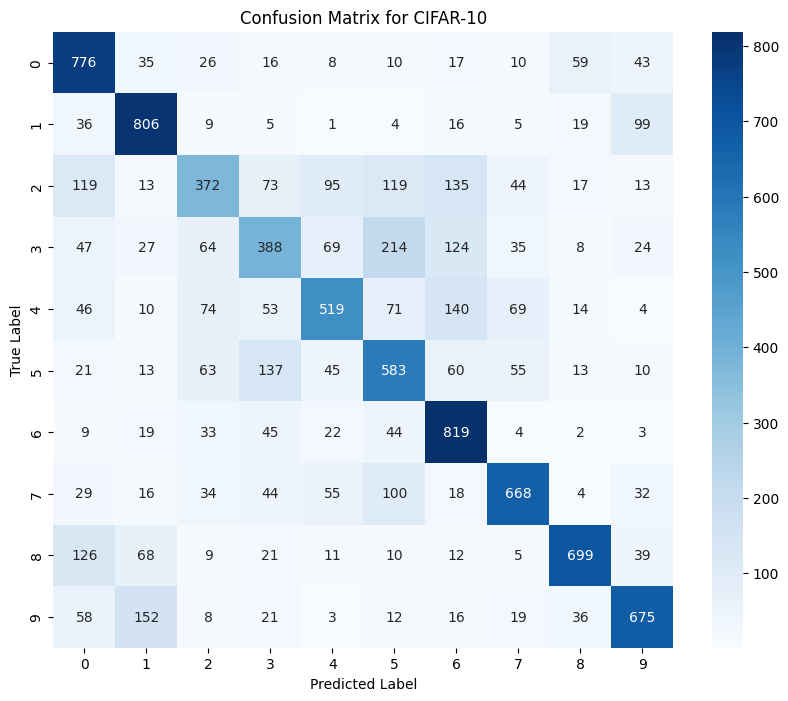

In [11]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get predictions
y_pred_probs = model1.predict(x_test)  # Softmax probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot labels to class labels


# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

### Building 2nd CNN model

In [12]:
from keras.backend import clear_session
clear_session()

In [13]:

import tensorflow as tf

model2 = tf.keras.models.Sequential([
    # First Conv Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Conv Block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Third Conv Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Fourth Conv Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='softmax')
])


model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 256)      1024      
 hNormalization)                                                 
                                                        

In [14]:
# Compile Model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks: Early Stopping & Model Checkpoint
ea = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

# Train Model
history2 = model2.fit(x_train, y_train_one_hot, epochs=500, batch_size=64, validation_split=0.2,
          callbacks=[ea, mc])

Epoch 1/500
625/625 [==============================] - 11s 16ms/step - loss: 2.5905 - accuracy: 0.3552 - val_loss: 1.9987 - val_accuracy: 0.4809
Epoch 2/500
625/625 [==============================] - 9s 15ms/step - loss: 1.8107 - accuracy: 0.5303 - val_loss: 1.9080 - val_accuracy: 0.4841
Epoch 3/500
625/625 [==============================] - 9s 15ms/step - loss: 1.7205 - accuracy: 0.6099 - val_loss: 1.7973 - val_accuracy: 0.5860
Epoch 4/500
625/625 [==============================] - 9s 14ms/step - loss: 1.7101 - accuracy: 0.6474 - val_loss: 1.8705 - val_accuracy: 0.5916
Epoch 5/500
625/625 [==============================] - 9s 14ms/step - loss: 1.7135 - accuracy: 0.6722 - val_loss: 2.0783 - val_accuracy: 0.5341
Epoch 6/500
625/625 [==============================] - 9s 14ms/step - loss: 1.6879 - accuracy: 0.6971 - val_loss: 2.0024 - val_accuracy: 0.5788
Epoch 7/500
625/625 [==============================] - 9s 15ms/step - loss: 1.6410 - accuracy: 0.7112 - val_loss: 1.6851 - val_accuracy

In [15]:
model2.load_weights('best_cnn_model.h5')
test_accuracy = model2.evaluate(x_test, y_test_one_hot)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 1.2907 - accuracy: 0.7827
Test accuracy: [1.2906557321548462, 0.7827000021934509]


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Make predictions on the test set
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test_one_hot, axis=1)  # Convert true labels to class labels

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.7827
Precision: 0.7907
Recall: 0.7827
F1 Score: 0.7810

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.95      0.84      0.89      1000
           2       0.73      0.69      0.71      1000
           3       0.71      0.49      0.58      1000
           4       0.64      0.88      0.74      1000
           5       0.66      0.78      0.71      1000
           6       0.88      0.77      0.82      1000
           7       0.85      0.80      0.82      1000
           8       0.83      0.90      0.86      1000
           9       0.82      0.90      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



313/313 [==============================] - 1s 2ms/step


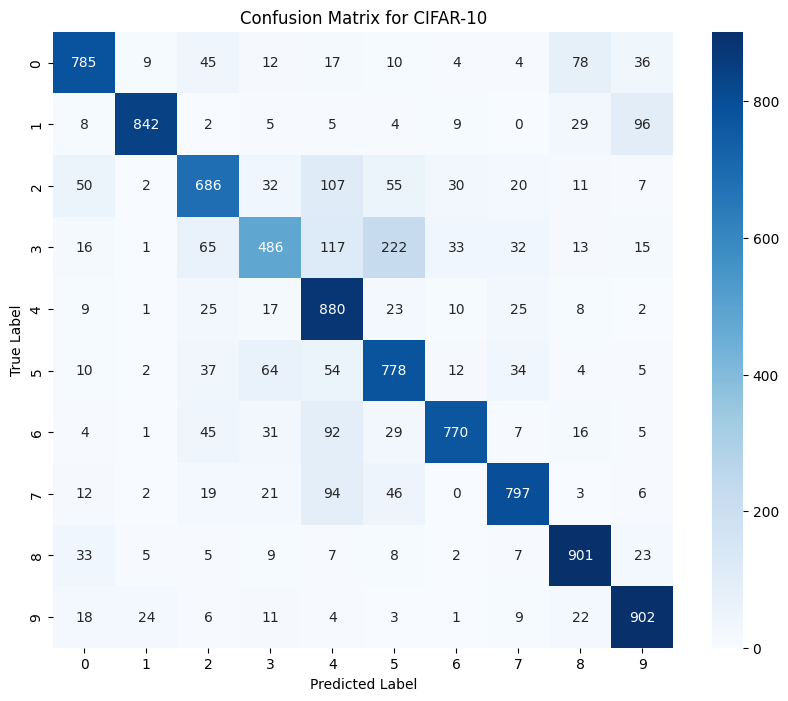

In [17]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get predictions
y_pred_probs = model2.predict(x_test)  # Softmax probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot labels to class labels


# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

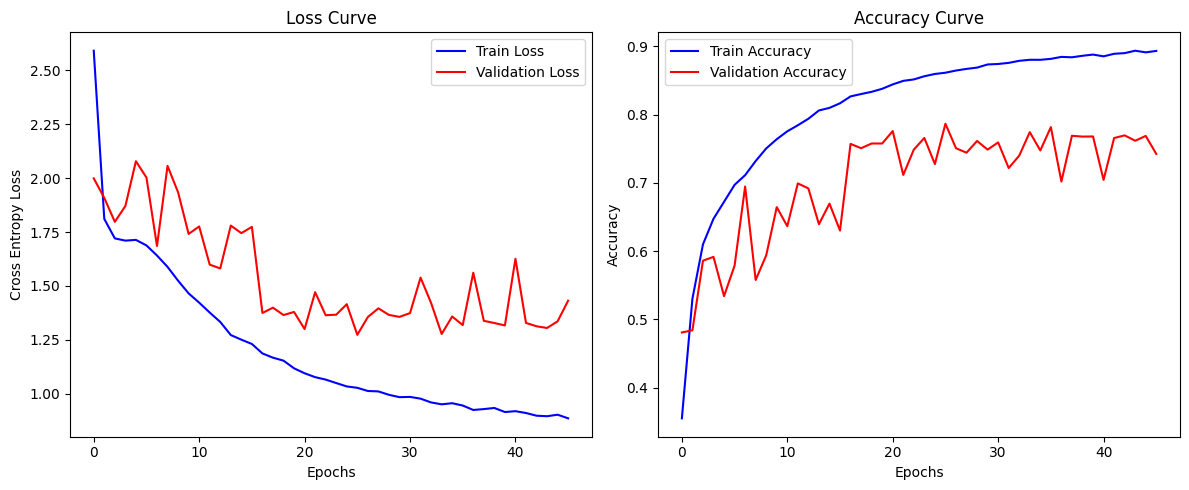

In [18]:
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

### Save the Best CNN Model

In [19]:
model2.save('best_cnn_model.h5')

### Building Our Third Model (Transfer Learning)

In [65]:
from keras.backend import clear_session
clear_session()

In [66]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Unfreeze the top 4 layers for fine-tuning
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Add classification head with batch normalization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output = Dense(10, activation='softmax')(x)


# Define the model
vgg_model = Model(inputs=base_model.input, outputs=output)

vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [67]:
# Compile with lower learning rate
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.7, 1.3],
    shear_range=0.2,
    fill_mode='nearest'
)

# Callbacks
initial_learning_rate = 0.0003
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.3, patience=3, verbose=1
)
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

vgg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

mc = tf.keras.callbacks.ModelCheckpoint('best_vgg_model.h5', save_best_only=True)

# Train Model with augmentation
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

history_vgg = vgg_model.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=64),
    epochs=50,
)

vgg_model.save('best_vgg_model.h5')

Epoch 1/50
782/782 [==============================] - 31s 38ms/step - loss: 2.6632 - accuracy: 0.1036
Epoch 2/50
782/782 [==============================] - 30s 39ms/step - loss: 2.4664 - accuracy: 0.1030
Epoch 3/50
782/782 [==============================] - 31s 40ms/step - loss: 2.4239 - accuracy: 0.1040
Epoch 4/50
782/782 [==============================] - 30s 38ms/step - loss: 2.3982 - accuracy: 0.1025
Epoch 5/50
782/782 [==============================] - 31s 39ms/step - loss: 2.3821 - accuracy: 0.1010
Epoch 6/50
782/782 [==============================] - 31s 39ms/step - loss: 2.3627 - accuracy: 0.1060
Epoch 7/50
782/782 [==============================] - 32s 40ms/step - loss: 2.3546 - accuracy: 0.1042
Epoch 8/50
782/782 [==============================] - 29s 38ms/step - loss: 2.3447 - accuracy: 0.1070
Epoch 9/50
782/782 [==============================] - 30s 38ms/step - loss: 2.3378 - accuracy: 0.1037
Epoch 10/50
782/782 [==============================] - 30s 38ms/step - loss: 2.331

KeyboardInterrupt: 

In [ ]:
# Loading best model

vgg_model.load_weights('best_vgg_model.h5')

OSError: Unable to synchronously open file (file signature not found)

In [ ]:
# Evaluate VGG16 Transfer Learning Model
vgg_results = vgg_model.evaluate(x_test, y_test, verbose=0)
vgg_loss, vgg_acc = vgg_results[0], vgg_results[1]


print(f"VGG16 - Test Loss: {vgg_loss:.4f}, Test Accuracy: {vgg_acc:.4f}")

In [ ]:
import matplotlib.pyplot as plt


def plot_performance(history, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))


    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axs[0].set_title(f'{title} - Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss Plot
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Val Loss')
    axs[1].set_title(f'{title} - Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

# Plot for VGG16 Transfer Learning
plot_performance(history_vgg, "VGG16 Transfer Learning")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from VGG16 model
y_pred_probs = vgg_model.predict(x_test)  # Softmax probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG16 on CIFAR-10")
plt.show()

In [ ]:
# Save the trained VGG16 model
vgg_model.save("VGG16_Best_Model.keras")

### Comparing & Choosing the Best Model

In [ ]:
# Evaluate Custom CNN
custom_cnn_results = model1.evaluate(x_test, y_test, verbose=0)
custom_cnn_loss, custom_cnn_acc = custom_cnn_results[0], custom_cnn_results[1]

# Evaluate VGG16 Transfer Learning Model
vgg_results = vgg_model.evaluate(x_test, y_test, verbose=0)
vgg_loss, vgg_acc = vgg_results[0], vgg_results[1]

# Print Results
print(f"Custom CNN - Test Loss: {custom_cnn_loss:.4f}, Test Accuracy: {custom_cnn_acc:.4f}")
print(f"VGG16 - Test Loss: {vgg_loss:.4f}, Test Accuracy: {vgg_acc:.4f}")